In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [2]:
# create sparse universe
universe = np.linspace(-2,2,5)

# create fuzzy vars
error = ctrl.Antecedent(universe, 'error')
delta = ctrl.Antecedent(universe, 'delta')
output = ctrl.Consequent(universe, 'output')

# autogenerate membership functions
names = ['nb', 'ns', 'ze', 'ps', 'pb']
error.automf(names=names)
delta.automf(names=names)
output.automf(names=names)

In [3]:
# ruleset from skfuzzy worked example: 
# https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_control_system_advanced.html#example-plot-control-system-advanced-py

rule0 = ctrl.Rule(antecedent=((error['nb'] & delta['nb']) |
                              (error['ns'] & delta['nb']) |
                              (error['nb'] & delta['ns'])),
                  consequent=output['nb'], label='rule nb')

rule1 = ctrl.Rule(antecedent=((error['nb'] & delta['ze']) |
                              (error['nb'] & delta['ps']) |
                              (error['ns'] & delta['ns']) |
                              (error['ns'] & delta['ze']) |
                              (error['ze'] & delta['ns']) |
                              (error['ze'] & delta['nb']) |
                              (error['ps'] & delta['nb'])),
                  consequent=output['ns'], label='rule ns')

rule2 = ctrl.Rule(antecedent=((error['nb'] & delta['pb']) |
                              (error['ns'] & delta['ps']) |
                              (error['ze'] & delta['ze']) |
                              (error['ps'] & delta['ns']) |
                              (error['pb'] & delta['nb'])),
                  consequent=output['ze'], label='rule ze')

rule3 = ctrl.Rule(antecedent=((error['ns'] & delta['pb']) |
                              (error['ze'] & delta['pb']) |
                              (error['ze'] & delta['ps']) |
                              (error['ps'] & delta['ps']) |
                              (error['ps'] & delta['ze']) |
                              (error['pb'] & delta['ze']) |
                              (error['pb'] & delta['ns'])),
                  consequent=output['ps'], label='rule ps')

rule4 = ctrl.Rule(antecedent=((error['ps'] & delta['pb']) |
                              (error['pb'] & delta['pb']) |
                              (error['pb'] & delta['ps'])),
                  consequent=output['pb'], label='rule pb')

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

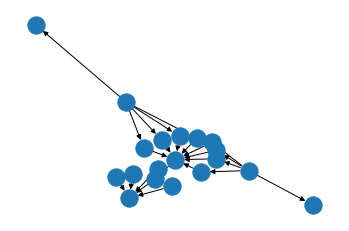

In [5]:
rule1.view()

In [6]:
# init control system
system = ctrl.ControlSystem(rules=[rule0, rule1, rule2, rule3, rule4])

# system will run with 21*21 inputs
# allow 21*21 + 1 inputs before results flushed
sim = ctrl.ControlSystemSimulation(system, flush_after_run=21*21+1)

In [7]:
# view control space
upsampled = np.linspace(-2,2,21) # higher resolution sim
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)

# loop through 21*21 times to collect control surface
for i in range(21):
    for j in range(21):
        sim.input['error'] = x[i,j]
        sim.input['delta'] = y[i,j]
        sim.compute()
        z[i,j] = sim.output['output']

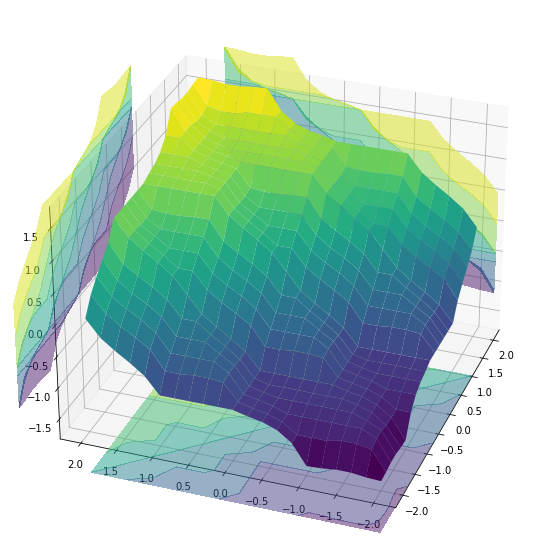

In [16]:
# plot results in 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', linewidth=0.4, antialiased=True)

# add contours
cset = ax.contourf(x, y, z, zdir='z', offset=-2.5, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='x', offset=3, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='y', offset=3, cmap='viridis', alpha=0.5)

ax.view_init(30,200)